Project: Iris Flower Classification

This project uses the Iris dataset to build a Random Forest model that classifies iris flower species based on sepal and petal measurements.
Tools used: Python, Pandas, Seaborn, Scikit-learn, KaggleHub.

Cell 1: Import Libraries

In [44]:
# Step 1: Import Required Libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


Step 2: Download Dataset from Kaggle

In [45]:
# Step 2: Download the Iris dataset from Kaggle

print("Downloading Iris dataset from Kaggle...")
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
print("Dataset downloaded successfully!")
print("Dataset folder path:", path)


Dataset downloaded successfully!
Dataset folder path: C:\Users\eyerusalem\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


step 3: Load and Inspect the Data

In [46]:
# Step 3: Load and Preview the Dataset

csv_path = path + "/IRIS.csv"  
df = pd.read_csv(csv_path)

print("Dataset loaded successfully!")
print("\n First few rows of the dataset:")
display(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Summary Statistics:")
display(df.describe())


Dataset loaded successfully!

 First few rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

 Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


step 4: Data Cleaning & Preprocessing

In [47]:
# Step 4: Check for Missing Values and Clean Data

print("Checking for missing values:")
print(df.isnull().sum())

# (Optional) Drop duplicates
df = df.drop_duplicates()

print("\n Cleaned Data Duplicates removed if any.")
print(f"Dataset shape after cleaning: {df.shape}")


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

 Cleaned Data Duplicates removed if any.
Dataset shape after cleaning: (147, 5)


Step 5: Data Visualization

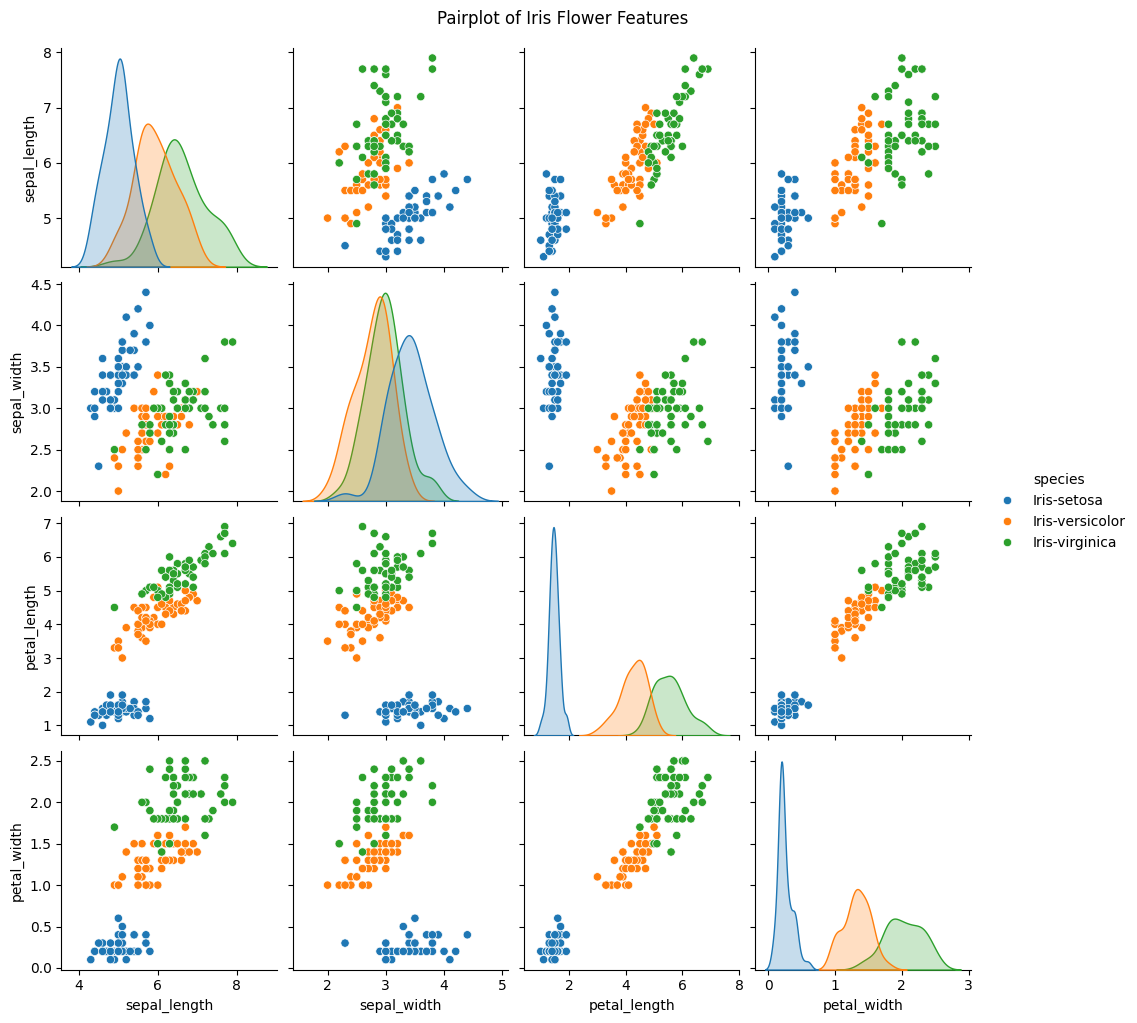

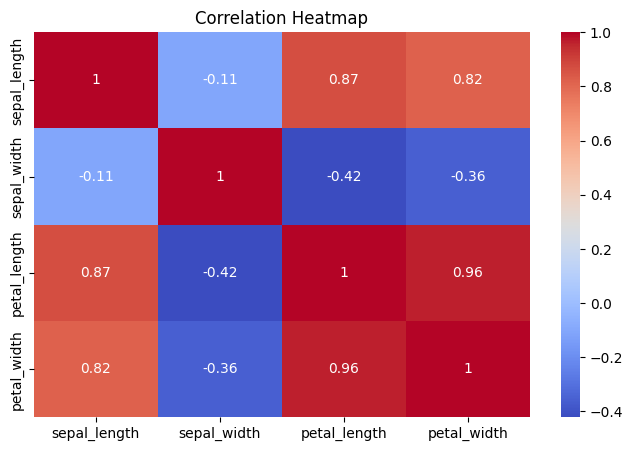

In [48]:
#  Step 5: Visualize the Dataset

sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Flower Features", y=1.02)
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Step 6: Feature and Label Preparation

In [49]:
# Step 6: Separate Features and Target Variable

X = df.drop('species', axis=1)
y = LabelEncoder().fit_transform(df['species'])

print("Features and labels prepared.")
print("Feature columns:", list(X.columns))
print("Target example:", y[:5])


Features and labels prepared.
Feature columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Target example: [0 0 0 0 0]


Step 7: Split Dataset into Train & Test

In [50]:
# Step 7: Split Dataset into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split complete.")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Data split complete.
Training samples: 117
Testing samples: 30


Step 8: Train Model (Random Forest Classifier)

In [51]:
# Step 8: Train the Model

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print(" Model training complete!")


 Model training complete!


Step 9: Evaluate Model Performance

In [52]:
# Step 9: Model Evaluation

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Evaluation Complete!")
print(f"Accuracy: {accuracy:.2f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation Complete!
Accuracy: 0.93

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



 Step 10: Visualize Confusion Matrix

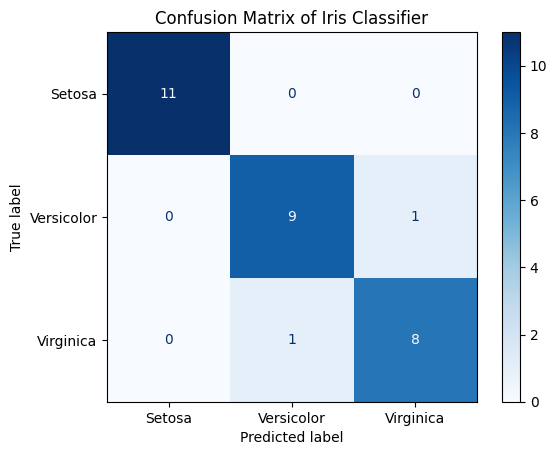

In [53]:
# Step 9: Visualize Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Iris Classifier")
plt.show()


Step 10: Feature Importance

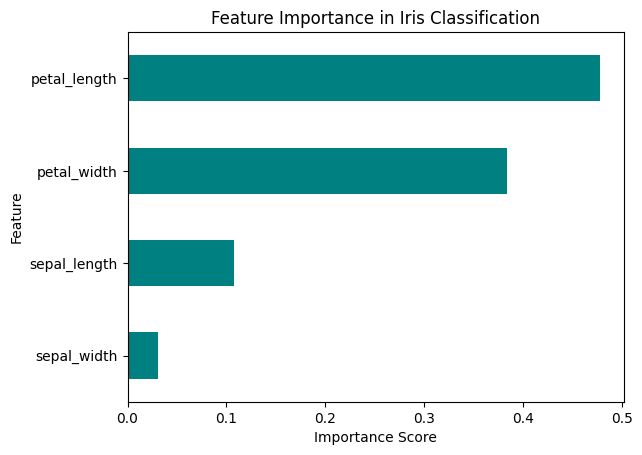

In [54]:
# Step 10: Feature Importance
import numpy as np

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Iris Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Step 11: Hyperparameter Tuning using GridSearchCV

In [55]:
# Step 11: Hyperparameter Tuning using GridSearchCV
# Define possible hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# Evaluate again
y_pred_best = best_model.predict(X_test)
print("\n Improved Accuracy:", accuracy_score(y_test, y_pred_best))  

Best Parameters Found:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

 Improved Accuracy: 0.9333333333333333
